# Homework 3: Feature Engineering, KNN, and Decision Trees

By Rachel Manzelli and Brian Kulis with the help of N. Frumkin, K. Chauhan, and A. Tsiligkaridis


*Wine classification dataset from the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Wine*

*Sea level dataset from NASA's climate change repository: https://climate.nasa.gov/vital-signs/*

## Preamble

Download the `hw3` folder from here: https://github.com/nfrumkin/EC414/tree/master/homework/hw3 (or clone the EC414 repository, if you prefer).

To run and solve this assignment, you must have a working Jupyter Notebook installation.

If you followed the installation instructions for `Python 3.6.x` and `Jupyter Notebook` from discussion 1, you should be set. In a terminal (cmd or Powershell for Windows users), navigate to the `hw3` folder. Then type `jupyter notebook` and press `Enter`.

If you have Anaconda, run Anaconda and choose this file (`EC414_HW3.ipynb`) in Anaconda's file explorer. Use `Python 3` version.

Below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find [Week 1 discussion material](https://github.com/nfrumkin/EC414/blob/master/discussions/Week%201%20-%20Python%20Review.ipynb) useful. 

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]` ("play") button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. [Double] click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file(s) to Blackboard by the due date (see Schedule).

## Problem 1: Feature Engineering

Given the sea level rise data over the past 25 years as a training set (`sealevel_train.csv`) and the past year's sea level rise data as a testing set (`sealevel_test.csv`):

**a.** Apply Ordinary Least Squares regression on the training data. Plot both the training data and the regression curve on the same figure. *(Hint: use your code from Homework 2!)*

**b.** Using the testing set, calculate the mean squared error (MSE) between the ground truth testing data and the prediction given by your regression curve from part a. Recall that the mean squared error is given by $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$, where $y$ is the vector of $n$ observed values and $\hat{y}$ is the vector of $n$ predictions.

**c.** In machine learning, we often manipulate the raw data into some intermediary form to create a more robust feature representation. Repeat parts a. and b. for each of the following data transformations. *Be sure to apply the same transformation to the testing set before finding the MSE between the test data and the prediction.*

* Apply a rolling mean with a window size of 5, 7, and 15. This transformation is given by $x_j = \sum_{k=i}^{i+window size}(\frac{x_k}{windowsize})$. With the $n$ data points given, pad the final values with zero. (For example, the mean at $n-2$ includes points $n-2$, $n-1$, and $n$, and will be 0 for $n+1$ and $n+2$ because we do not have data for those points.)

* Apply first order differencing. The transformation is given by $x_{j} = x_i - x_{i-1}$ for every data point $x_i$ in the dataset, excluding the first data point.

* One other data transformation of your choice. *Be sure to explain your transformation.*

In [6]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [7]:
# Read training set
sea_level_df = pd.read_csv("sealevel_train.csv")
sea_level_df.head()

,time,level_variation
0,1993.011526,-37.52
1,1993.038692,-38.05
2,1993.065858,-37.61
3,1993.093025,-37.49
4,1993.120191,-36.48


In [8]:
# Read testing set
sea_level_df_test = pd.read_csv("sealevel_test.csv")
sea_level_df_test.head()

,time,level_variation
0,2013.453940,26.31
1,2013.481106,26.32
2,2013.508272,26.44
3,2013.535439,26.54
4,2013.562605,26.49


[[2.90021144]]
[-5815.0064476]


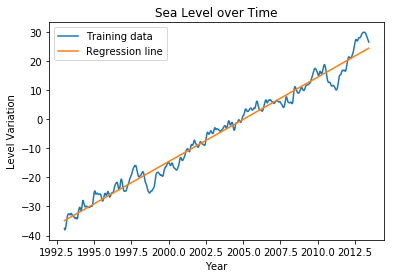

In [9]:
# Part a - Fit linear regression model to training data (find OLS coefficients) #

x = sea_level_df[['time']]
y = sea_level_df[['level_variation']]
reg = LinearRegression().fit(x, y)
print(reg.coef_)
print(reg.intercept_)
# Predict using OLS model

y_predict = x*reg.coef_[0] + reg.intercept_

# Plot training data along with the regression curve

plt.plot(x,y, label="Training data")
plt.plot(x,y_predict, label="Regression line")
plt.xlabel("Year")
plt.ylabel("Level Variation")
plt.title("Sea Level over Time")
plt.legend()

90.73366367292017


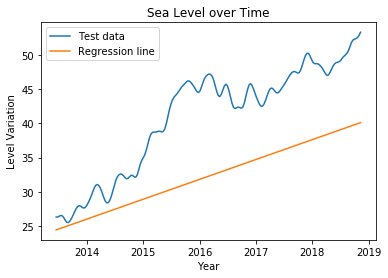

In [86]:
# Part b - Prediction of testing points #

# Calculate mean squared error between ground truth and predictions
x_test = sea_level_df_test[['time']]
y_test = sea_level_df_test[['level_variation']]
y_test_pred = x_test*reg.coef_[0] + reg.intercept_

mse = mean_squared_error(y_test, y_test_pred)
print(mse)

#plotting y_test and y_test_pred just to see the difference
plt.plot(x_test,y_test, label="Test data")
plt.plot(x_test,y_test_pred, label="Regression line")
plt.xlabel("Year")
plt.ylabel("Level Variation")
plt.title("Sea Level over Time")
plt.legend()

Rolling mean, window size 5
coef:  [[2.90025083]]
intercept:  [-5815.2568685]
mse:  89.06173399084769

Rolling mean, window size 7
coef:  [[2.89977081]]
intercept:  [-5814.38195573]
mse:  88.33453555217255

Rolling mean, window size 15
coef:  [[2.89369057]]
intercept:  [-5802.54912522]
mse:  86.87272790421812


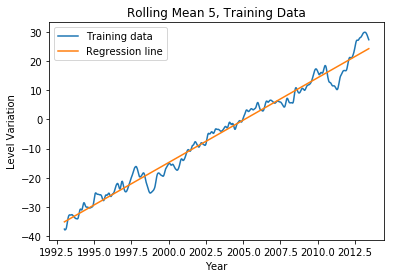

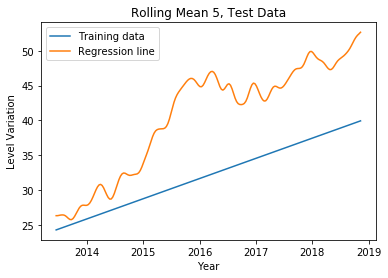

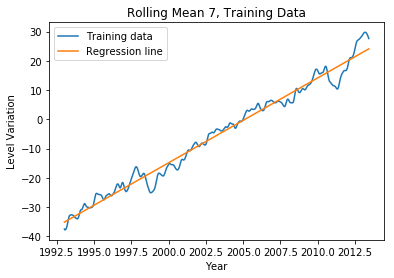

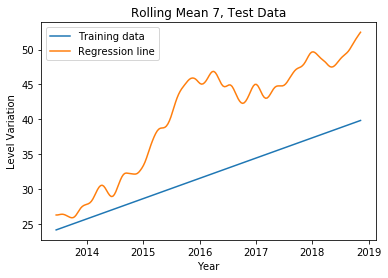

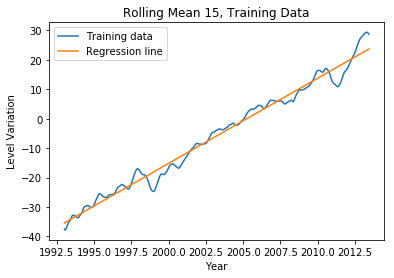

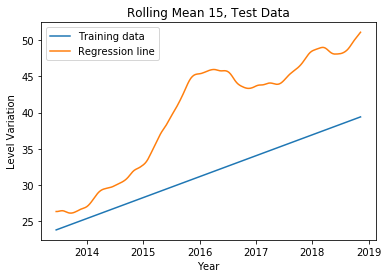

In [87]:
# Part c - data transformations #
# ROLLING MEAN

y_roll5 = y.rolling(5, min_periods=1).mean()


# Repeat parts a and b for rolling mean
reg5 = LinearRegression().fit(x, y_roll5)
print("Rolling mean, window size 5")
print("coef: ",reg5.coef_)
print("intercept: ", reg5.intercept_)
# Predict using OLS model

y_roll5_predict = x*reg5.coef_[0] + reg5.intercept_

# Plot training data along with the regression curve

plt.plot(x,y_roll5, label="Training data")
plt.plot(x,y_roll5_predict, label="Regression line")

plt.xlabel("Year")
plt.ylabel("Level Variation")
plt.title("Rolling Mean 5, Training Data")
plt.legend()



y_roll5_test = y_test.rolling(5, min_periods=1).mean()
y_roll5_predictTest = x_test*reg5.coef_[0] + reg5.intercept_

plt.figure()
plt.plot(x_test,y_roll5_predictTest, label="Training data")
plt.plot(x_test,y_roll5_test, label="Regression line")
plt.xlabel("Year")
plt.ylabel("Level Variation")
plt.title("Rolling Mean 5, Test Data")
plt.legend()

mse5 = mean_squared_error(y_roll5_test, y_roll5_predictTest)
print("mse: ", mse5)

#################################################################################

#Roll7

y_roll7 = y.rolling(7, min_periods=1).mean()


# Repeat parts a and b for rolling mean
reg7 = LinearRegression().fit(x, y_roll7)
print("\nRolling mean, window size 7")
print("coef: ",reg7.coef_)
print("intercept: ",reg7.intercept_)
# Predict using OLS model

y_roll7_predict = x*reg7.coef_[0] + reg7.intercept_

# Plot training data along with the regression curve

plt.figure()
plt.plot(x,y_roll7, label="Training data")
plt.plot(x,y_roll7_predict, label="Regression line")
plt.xlabel("Year")
plt.ylabel("Level Variation")
plt.title("Rolling Mean 7, Training Data")
plt.legend()



y_roll7_test = y_test.rolling(7, min_periods=1).mean()
y_roll7_predictTest = x_test*reg7.coef_[0] + reg7.intercept_

plt.figure()
plt.plot(x_test,y_roll7_predictTest, label="Training data")
plt.plot(x_test,y_roll7_test, label="Regression line")
plt.xlabel("Year")
plt.ylabel("Level Variation")
plt.title("Rolling Mean 7, Test Data")
plt.legend()

mse7 = mean_squared_error(y_roll7_test, y_roll7_predictTest)
print("mse: ", mse7)

#################################################################################

#Roll15

y_roll15 = y.rolling(15, min_periods=1).mean()


# Repeat parts a and b for rolling mean
reg15 = LinearRegression().fit(x, y_roll15)
print("\nRolling mean, window size 15")
print("coef: ",reg15.coef_)
print("intercept: ",reg15.intercept_)
# Predict using OLS model

y_roll15_predict = x*reg15.coef_[0] + reg15.intercept_

# Plot training data along with the regression curve

plt.figure()
plt.plot(x,y_roll15, label="Training data")
plt.plot(x,y_roll15_predict, label="Regression line")
plt.xlabel("Year")
plt.ylabel("Level Variation")
plt.title("Rolling Mean 15, Training Data")
plt.legend()



y_roll15_test = y_test.rolling(15, min_periods=1).mean()
y_roll15_predictTest = x_test*reg15.coef_[0] + reg15.intercept_

plt.figure()
plt.plot(x_test,y_roll15_predictTest, label="Training data")
plt.plot(x_test,y_roll15_test, label="Regression line")
plt.xlabel("Year")
plt.ylabel("Level Variation")
plt.title("Rolling Mean 15, Test Data")
plt.legend()

mse15 = mean_squared_error(y_roll15_test, y_roll15_predictTest)
print("mse: ", mse15)

In [4]:
# Part c - data transformations #
# FIRST ORDER DIFFERENCING

x = sea_level_df[['time']]
y = sea_level_df[['level_variation']]
y_diff_T = np.diff(y.T)
y_diff = y_diff_T.T
reg_diff = LinearRegression().fit(x[1:np.size(y)], y_diff)
print("coef: ", reg_diff.coef_)
print("intercept: ", reg_diff.intercept_)
# Predict using OLS model

y_diff_predict = x*reg_diff.coef_[0] + reg_diff.intercept_

# Plot training data along with the regression curve

plt.plot(x[1:752],y_diff, label="Training data")
plt.plot(x,y_diff_predict, label="Regression line")
plt.xlabel("Year")
plt.ylabel("Level Variation")
plt.title("First Order Differencing of Sea Level over Time")
plt.legend()


NameError: name 'sea_level_df' is not defined

coef:  [[-0.00021296]]
intercept:  [0.51179625]
mse:  0.16652731586159053


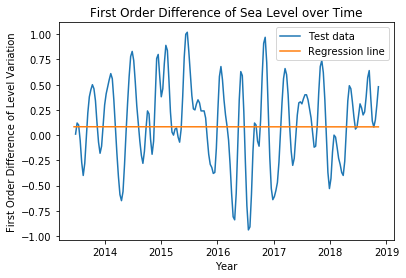

In [105]:
x_test = sea_level_df_test[['time']]
y_test = sea_level_df_test[['level_variation']]
y_test_diff_T = np.diff(y_test.T)
y_test_diff = y_test_diff_T.T

y_test_pred_diff = x_test*reg_diff.coef_[0] + reg_diff.intercept_
print("coef: ", reg_diff.coef_)
print("intercept: ", reg_diff.intercept_)
mse_diff = mean_squared_error(y_test_diff, y_test_pred_diff[1:np.size(y_test)])
print("mse: ", mse_diff)

#plotting y_test and y_test_pred just to see the difference
plt.plot(x_test[1:np.size(y_test)],y_test_diff, label="Test data")
plt.plot(x_test,y_test_pred_diff, label="Regression line")
plt.xlabel("Year")
plt.ylabel("First Order Difference of Level Variation")
plt.title("First Order Difference of Sea Level over Time")
plt.legend()

coef:  [[-0.00040005]]
intercept:  [0.80166617]


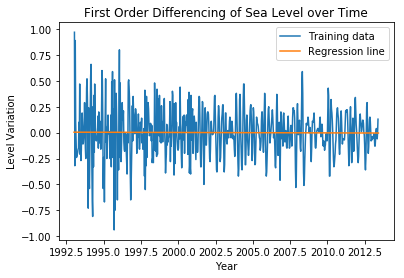

In [106]:
# Part c - data transformations #
# YOUR OWN TRANSFORMATION

# Repeat parts a and b for your own transformation


#Taking the 2nd order difference

y_diff2_T = np.diff(y_diff.T)
y_diff2 = y_diff2_T.T
reg_diff2 = LinearRegression().fit(x[1:np.size(y_diff)], y_diff2)
print("coef: ", reg_diff2.coef_)
print("intercept: ", reg_diff2.intercept_)
# Predict using OLS model

y_diff2_predict = x*reg_diff2.coef_[0] + reg_diff2.intercept_

# Plot training data along with the regression curve

plt.plot(x[1:751],y_diff2, label="Training data")
plt.plot(x,y_diff2_predict, label="Regression line")
plt.xlabel("Year")
plt.ylabel("2nd Order Difference of Level Variation")
plt.title("2nd Order Differencing of Sea Level over Time")
plt.legend()


coef:  [[-0.00040005]]
intercept:  [0.80166617]
mse:  0.04086666433203607


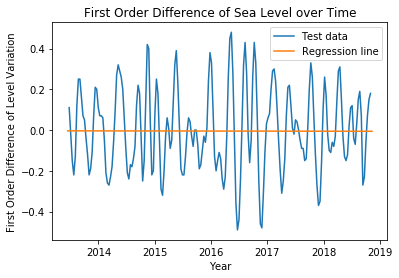

In [107]:
y_test_diff2_T = np.diff(y_test_diff.T)
y_test_diff2 = y_test_diff2_T.T

y_test_pred_diff2 = x_test*reg_diff2.coef_[0] + reg_diff2.intercept_
print("coef: ", reg_diff2.coef_)
print("intercept: ", reg_diff2.intercept_)
mse_diff2 = mean_squared_error(y_test_diff2, y_test_pred_diff2[1:np.size(y_test_diff)])
print("mse: ", mse_diff2)

#plotting y_test and y_test_pred just to see the difference
plt.plot(x_test[1:np.size(y_test_diff)],y_test_diff2, label="Test data")
plt.plot(x_test,y_test_pred_diff2, label="Regression line")
plt.xlabel("Year")
plt.ylabel("2nd Order Difference of Level Variation")
plt.title("2nd Order Difference of Sea Level over Time")
plt.legend()

coef:  [[0.09733416]]
intercept:  [-191.55864706]


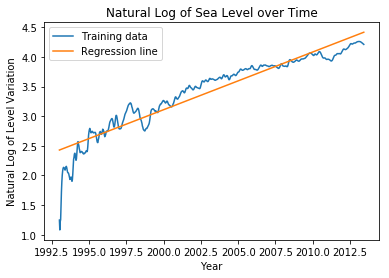

In [110]:
# Part c - data transformations #
# YOUR OWN TRANSFORMATION

# Repeat parts a and b for your own transformation

import math as ma
#Transforming the data by taking the natural log of the y values.
#Add 40 before taking the natural log so that all the y values are positive

x = sea_level_df[['time']]
y = sea_level_df[['level_variation']]
y = y.values
y_log = y
for i in range(0, np.size(y)):
    y_log[i] = ma.log1p(y[i] + 40)
reg_log = LinearRegression().fit(x, y_log)
print("coef: ", reg_log.coef_)
print("intercept: ", reg_log.intercept_)
# Predict using OLS model

y_log_predict = x*reg_log.coef_[0] + reg_log.intercept_

# Plot training data along with the regression curve

plt.plot(x,y_log, label="Training data")
plt.plot(x,y_log_predict, label="Regression line")
plt.xlabel("Year")
plt.ylabel("Natural Log of Level Variation")
plt.title("Natural Log of Sea Level over Time")
plt.legend()

MSE of natural log transformation:  0.08468218589164939


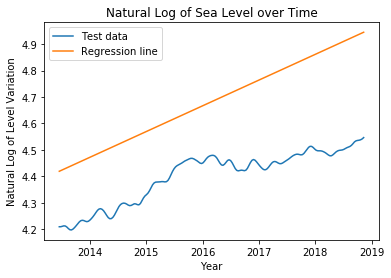

In [111]:
x_test = sea_level_df_test[['time']]
y_test = sea_level_df_test[['level_variation']]
y_test = y_test.values
y_test_pred_log = x_test*reg_log.coef_[0] + reg_log.intercept_

y_log_test= y_test
for i in range(0, np.size(y_test)):
    y_log_test[i] = ma.log1p(y_test[i] + 40)

mse_log = mean_squared_error(y_log_test, y_test_pred_log)
print("MSE of natural log transformation: ", mse_log)

#plotting y_test and y_test_pred just to see the difference
plt.plot(x_test,y_log_test, label="Test data")
plt.plot(x_test,y_test_pred_log, label="Regression line")
plt.xlabel("Year")
plt.ylabel("Natural Log of Level Variation")
plt.title("Natural Log of Sea Level over Time")
plt.legend()

## Problem 2: K-Nearest Neighbors

Consider the following five two-dimensional training points, belonging to class + or class -:

$(0,1,+)$

$(1,1,-)$

$(2,2,+)$

$(2,0,+)$

$(3,1,-)$

**a.** Plot these five points. Then, draw the decision boundary for a **1-nearest-neighbor classifier (with Euclidean distance).** *Be sure to show or explain how you found your decision boundary.*

**b.** Classify the following test points, and add them to your plot:

$(0,0)$

$(1,2)$

$(2,1)$

$(3,3)$

$(4,3)$

*Be sure to explain how you classified the test points.*

**c.** As you may or may not have seen in part b, it is possible for two neighbors with different class labels to have identical distances to a test point. In that case, explain how to choose a class for this point.

**Solution uploaded as a pdf**

## Problem 3: Nearest Neighbors vs. Decision Trees

Not all machine learning algorithms perform well on all types of data; performance is often dependent on how the data is distributed. We ask you to compare the performance accuracies of k-nearest neighbors and decision trees on two datasets: the Iris dataset and the wine dataset.

The Iris flower dataset contains samples of attributes of 3 different variations of Iris flowers. This dataset has become very commonly used in training classification models. In fact, it has become so common that it exists within scikit-learn. The wine dataset contains attributes of 3 different types of wine. The datasets are imported and split into training and testing sets below for you. You can also get a preview of what they look like by running the two cells below.

**a.** Using the `KNeighborsClassifier` and `DecisionTreeClassifier` from scikit-learn, train and test k-nearest neighbors and decision trees on both datasets. When training the k-nearest neighbor algorithm, **do not choose a random number of neighbors, but instead *find the k that achieves the best accuracy in the range 1-10***. Compute the accuracies of each method (hint: you can use scikit-learn's `metrics.accuracy_score`).

**b.** Compare the accuracies of each algorithm on each dataset. **If there is a difference in their performance, why do you think this would be?**

*Please note that since sampling of data is random, accuracies may differ when you run the code again, and they will differ among your peers.*

In [119]:
# Import Iris dataset from scikit-learn, as well as algorithms
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Split data into training and testing sets
X = iris.data
y = iris.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X, y, test_size = 0.3) # here, our test set is 30% of whole set

# Show what Iris data looks like
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [120]:
# Load wine dataset
wine_df = pd.read_csv("wine.csv", names = ["class", "alc", "malic acid", "ash", "alcalinity", "mg", "phenols", "flavanoid", "nonflav phenols", "proanth", "color", "hue", "OD280/OD315", "proline"])

# Split dataset into train and test sets
X = wine_df
y = wine_df.pop('class')

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X, y, test_size = 0.3)

# Show what wine dataset looks like
wine_df.head()

,alc,malic acid,ash,alcalinity,mg,phenols,flavanoid,nonflav phenols,proanth,color,hue,OD280/OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [121]:
# IRIS DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set

knn_max_accuracy = 0
knn_max_k = 0

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_iris_train, y_iris_train)
    y_iris_predict = knn.predict(X_iris_test)
    accuracy = metrics.accuracy_score(y_iris_predict, y_iris_test)
    if accuracy > knn_max_accuracy:
        knn_max_accuracy = accuracy
        knn_max_k = k
        
# Construct a decision tree on the training data.
# Test decision tree with testing set
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_iris_train, y_iris_train)
y_iris_predict_tree = dtree.predict(X_iris_test)
tree_accuracy = metrics.accuracy_score(y_iris_predict_tree, y_iris_test)

# Compare accuracies between the two algorithms (print them out)
print("KNN best accuracy (from testing k=1 to 10): ", knn_max_accuracy)
print("k = ", knn_max_k)
print("Decision tree accuracy:", tree_accuracy)

KNN best accuracy (from testing k=1 to 10):  1.0
k =  7
Decision tree accuracy: 0.9111111111111111


In [46]:
# WINE DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set

knn_max_accuracy = 0
knn_max_k = 0

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_wine_train, y_wine_train)
    y_wine_predict = knn.predict(X_wine_test)
    accuracy = metrics.accuracy_score(y_wine_predict, y_wine_test)
    if accuracy > knn_max_accuracy:
        knn_max_accuracy = accuracy
        knn_max_k = k
        
# Construct a decision tree on the training data.
# Test decision tree with testing set
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_wine_train, y_wine_train)
y_wine_predict_tree = dtree.predict(X_wine_test)
tree_accuracy = metrics.accuracy_score(y_wine_predict_tree, y_wine_test)

# Compare accuracies between the two algorithms (print them out)
print("KNN best accuracy (from testing k=1 to 10): ", knn_max_accuracy)
print("k = ", knn_max_k)
print("Decision tree accuracy:", tree_accuracy)


KNN best accuracy (from testing k=1 to 10):  0.7407407407407407
k =  7
Decision tree accuracy: 0.8703703703703703


**Part b:** 
For the iris problem, K nearest neigbors has a better accuracy than decision tree. This could be because the actual decision boundary that we are trying to find for the iris problem is not just a simple line. K nearest neighbors is better at defining more intricate decision boundaries that are not merely just straight lines. 

For the wine problem, decision tree has a better accuracy than K nearest neighbors. This could be due to the features in the wine problem have drastically different scales. The feature proline is in the thousands, and varies by the order of hundreds. In comparison, hue values are small, and they differ in the order of decimals. Since K nearest neighbors looks for nearest neighbors in terms of distance, proline will have a much greater effect than hue in making decisions. Decision trees are not affected by varying feature ranges the same way KNN is, so the decision tree has a better accuracy

## Problem 4: Curse of Dimensionality and Nearest Neighbors

**Please note that you may find it easier to program this question in MATLAB. If you choose to use MATLAB, please submit a separate .m file with your code solution and either insert your plots into Jupyter (or, submit a separate document with the plots through Blackboard).**

Consider $n$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin, and suppose we are interested in nearest neighbors to the origin. It can be shown that the median distance from the origin to the closest data point under this scenario is given by the expression $(1-(\frac{1}{2})^{\frac{1}{n}})^{\frac{1}{p}}$. 

Now consider the following alternative scenario. Suppose $n$ data points are chosen uniformly
from $[−1, 1]^p$ (the interval $[−1, 1]$ in p dimensions). Now consider the nearest neighbor to a point at the origin in terms of the $l_∞$ norm: $\|x − y\|_∞ = max_i|x_i − y_i|$.

**a.** Write a piece of code that generates $n$ data points in $p$ dimensions distributed uniformly
in $[−1, 1]^p$, and computes the $l_∞$ nearest neighbors to the origin. For $n = 5$, $n = 50$, and $n = 500$, plot the nearest neighbor distances as a function of $p$, for $p = 1$ to $200$. On the same plot(s), also show the curves corresponding to the median distance expression given above.

**b.** What do you observe about the relationship between the formula and the $l_∞$ nearest neighbor distances? *Discuss and interpret all of your plots.*

**c. *Bonus*** Prove a relationship between the ∞ nearest neighbor distances and the above formula.

[0.         0.125823   0.26625532 0.3736417  0.35441273 0.41362155
 0.36039316 0.53722851 0.76000515 0.60507121 0.61420794 0.78625727
 0.74836115 0.59133996 0.73583687 0.73544918 0.82818442 0.72750484
 0.8370875  0.82885459 0.84543031 0.90912375 0.81060453 0.83070555
 0.79140733 0.87818905 0.81235512 0.88267371 0.88835368 0.85342975
 0.88393569 0.91433342 0.85465085 0.89835013 0.90206099 0.8759589
 0.8541041  0.92428559 0.91851214 0.93053574 0.89357832 0.899812
 0.88613528 0.92290413 0.87424125 0.91923403 0.91584509 0.92987896
 0.92175882 0.93978354 0.92444482 0.88685947 0.92547101 0.91260113
 0.93423541 0.8975549  0.93355608 0.92557032 0.94407077 0.91256325
 0.91498369 0.9263147  0.9538867  0.94500439 0.90699304 0.92436642
 0.93409903 0.94859791 0.9438583  0.94328492 0.91953943 0.9605957
 0.91452514 0.93429166 0.94457876 0.95713834 0.94689181 0.94898082
 0.93911021 0.940381   0.94795785 0.96779807 0.94884855 0.94292759
 0.95377684 0.94168879 0.95556297 0.93595028 0.95870595 0.92946448

Text(0.5, 1.0, 'All plots in one graph')

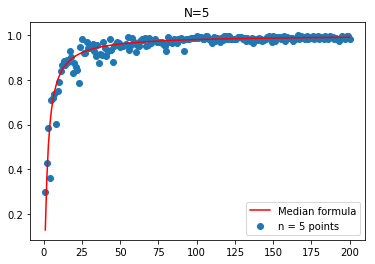

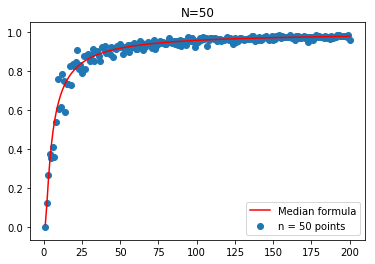

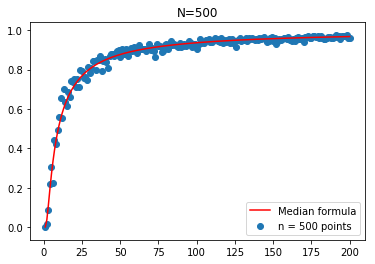

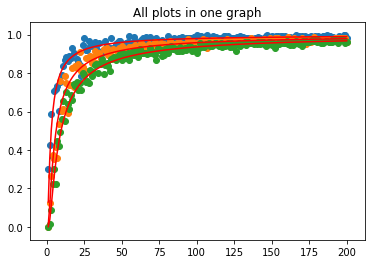

In [10]:
# Plot n p-dimensional uniformly-distributed data points
from numpy import linalg as LA

n_range = [5, 50, 500]

#print(np.random.uniform(-1,1,100))


x = np.linspace(1,200, 200)


median5 = (1-.5**(1/5))**(1/x)
n5 = np.zeros(200)
minNorm = 2
for p in range(1, 201):
    for i in range(5):
        norm = LA.norm(np.random.uniform(-1,1,p), np.inf)
        if norm < minNorm:
            minNorm = norm
    n5[p-1] = minNorm
    minNorm = 2
plt.figure()
plt.scatter(x, n5, label="n = 5 points")
plt.plot(x, median5, label="Median formula", color="red")
plt.title("N=5")
plt.legend()


median50 = (1-.5**(1/50))**(1/x)
n50 = np.zeros(200)
minNorm = 0
for p in range(1, 201):
    for i in range(50):
        norm = LA.norm(np.random.uniform(-1,1,p), np.inf)
        if norm < minNorm:
            minNorm = norm
    n50[p-1] = minNorm
    minNorm = 2
    
print(n50)
plt.figure()
plt.scatter(x, n50, label="n = 50 points")
plt.plot(x, median50, label="Median formula", color="red")
plt.title("N=50")
plt.legend()

median500 = (1-.5**(1/500))**(1/x)
n500 = np.zeros(200)
minNorm = 0
for p in range(1, 201):
    for i in range(500):
        norm = LA.norm(np.random.uniform(-1,1,p), np.inf)
        if norm < minNorm:
            minNorm = norm
    n500[p-1] = minNorm
    minNorm = 2
plt.figure()
plt.scatter(x, n500, label="n = 500 points")
plt.plot(x, median500, label="Median formula", color="red")
plt.title("N=500")
plt.legend()
    

    
plt.figure()
plt.scatter(x, n5, label="n = 5 points")
plt.plot(x, median5, label="Median5 formula", color="red")
plt.scatter(x, n50, label="n = 50 points")
plt.plot(x, median50, label="Median50 formula", color="red")
plt.scatter(x, n500, label="n = 500 points")
plt.plot(x, median500, label="Median500 formula", color="red")
plt.title("All plots in one graph")
# Compute nearest neighbors to the origin in terms of maximum norm


# Plot nearest neighbor distances as a function of p = 1:200 for n = 5, 50, 500. Plot curves 
# corresponding to the median distance expression on the same figure.

**Part b:**
In all of the graphs, as p increases, the distance between the origin and the point closest to the origin increases and converges towards 1. This follows what the curse of dimensionality is saying. As the number of dimensions increase, the randomly generated point that is closest to the origin gets closer and closer to the edge of the hypersphere.

Also, as n increases, the infinite norm scatter plot gets closer and closer to the median formula curve. This can be seen in the first 3 graphs as the scatter points get closer and closer to the median curve from the N=5 graph to the N=50 graph to the N=500 graph. This makes sense because as you use more test points, the test points will converge towards the expected curve.

Also, as n increases, the distance between the closest point and the origin approaches 1 slightly faster.